# Preprocessing

In [3]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
import numpy as np
from pathlib import Path
from datetime import datetime
import seaborn.objects as so


In [9]:
cuestionario = pd.read_excel("EGD-Cuestionario.xlsx", engine='openpyxl')
cuestionario.columns = cuestionario.iloc[0]
cuestionario = cuestionario.iloc[1:]

# Plots

## Pregunta P2.GC.1

In [15]:
CantPersonas = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.GC.1"]]
bin = [0,50,100,150,200,300,500,800,1000,3000,10000,50000,57000]
numerico = pd.to_numeric(CantPersonas['P2.GC.1'], errors='coerce').notna()
CantPersonas = CantPersonas.loc[numerico]
CantPersonas['P2.GC.1'].dropna(inplace=True)
CantPersonas["P2.GC.1"] = CantPersonas["P2.GC.1"].astype(int)
bins = pd.cut(CantPersonas['P2.GC.1'], bins=bin, include_lowest=True)
CantPersonas['intervalos'] = bins

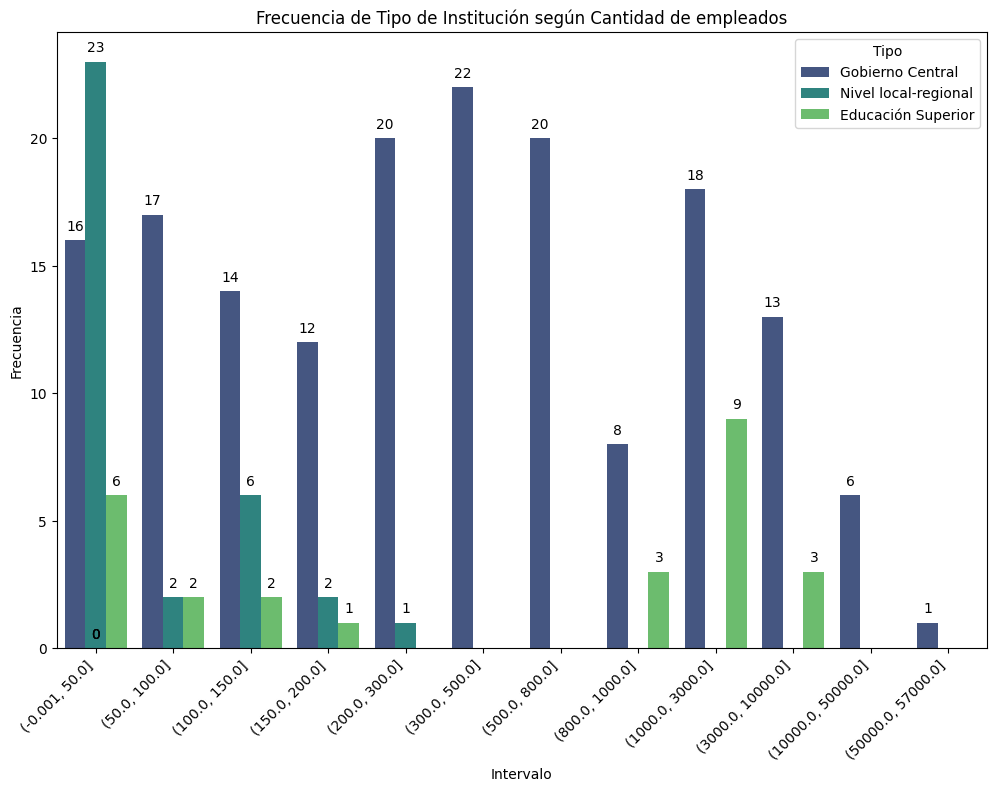

In [16]:
CantPersonas['intervalos'] = pd.Categorical(CantPersonas['intervalos'], ordered=True, categories=CantPersonas['intervalos'].unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CantPersonas, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Tipo de Institución según Cantidad de empleados')

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_4592\471746787.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Tipo', y='intervalos', data=CantPersonas,palette='viridis')


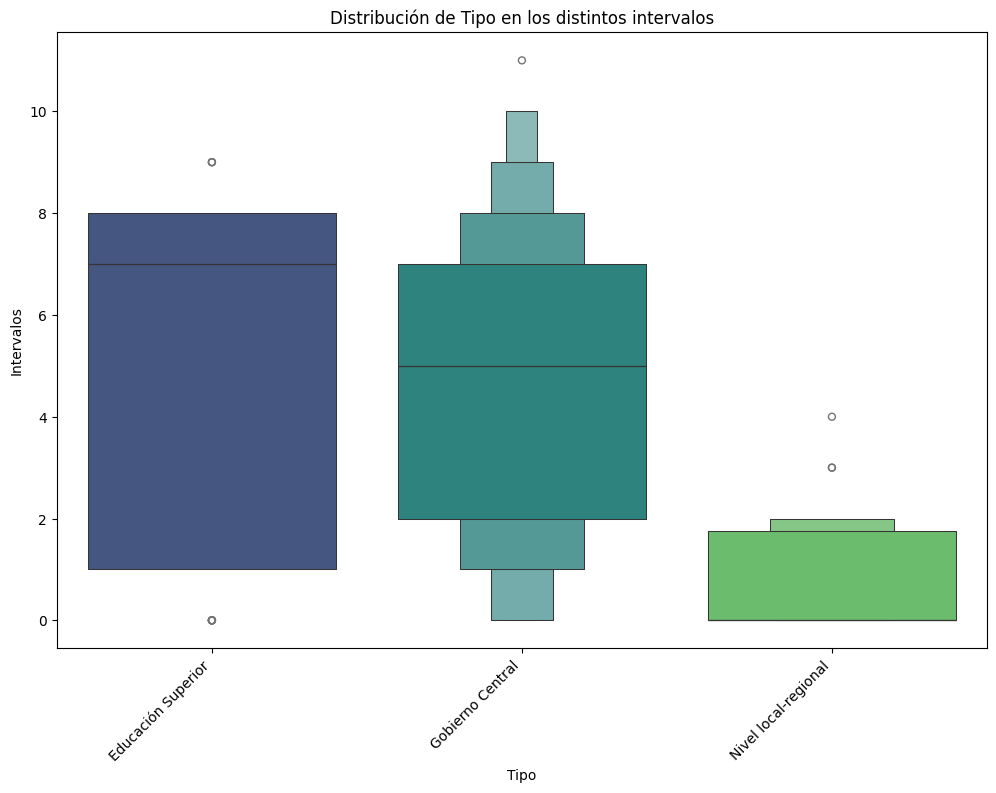

In [17]:
CantPersonas['intervalos'] = CantPersonas['intervalos'].cat.codes
CantPersonas['Tipo'] = CantPersonas['Tipo'].astype('category')

plt.figure(figsize=(12, 8))
sns.boxenplot(x='Tipo', y='intervalos', data=CantPersonas,palette='viridis')

plt.xlabel('Tipo')
plt.ylabel('Intervalos')
plt.title('Distribución de Tipo en los distintos intervalos')

plt.xticks(rotation=45, ha='right')

plt.show()


## Pregunta P2.M.1

In [18]:
CantPersonasAdm = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.M.1.1"]]

CantPersonasCorp = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.M.1.2"]]

In [19]:
#Administracion municipal
binAdm = [0, 50, 100, 200, 400, 800, 1200, 1800, 2200, 3000, 4000, 5000]
numerico = pd.to_numeric(CantPersonasAdm['P2.M.1.1'], errors='coerce').notna()
CantPersonasAdm = CantPersonasAdm.loc[numerico]
CantPersonasAdm['P2.M.1.1'].dropna(inplace=True)
CantPersonasAdm["P2.M.1.1"] = CantPersonasAdm["P2.M.1.1"].astype(int)
bins = pd.cut(CantPersonasAdm["P2.M.1.1"], bins=binAdm, include_lowest=True)
CantPersonasAdm['intervalos'] = bins

#Corp o fund municipales

binCorp = [0, 50, 100, 200, 400, 800, 1200, 1800, 2200, 3000, 4000, 6000]
numerico = pd.to_numeric(CantPersonasCorp['P2.M.1.2'], errors='coerce').notna()
CantPersonasCorp = CantPersonasCorp.loc[numerico]
CantPersonasCorp['P2.M.1.2'].dropna(inplace=True)
CantPersonasCorp["P2.M.1.2"] = CantPersonasCorp["P2.M.1.2"].astype(int)
bins = pd.cut(CantPersonasCorp["P2.M.1.2"], bins=binCorp, include_lowest=True)
CantPersonasCorp['intervalos'] = bins

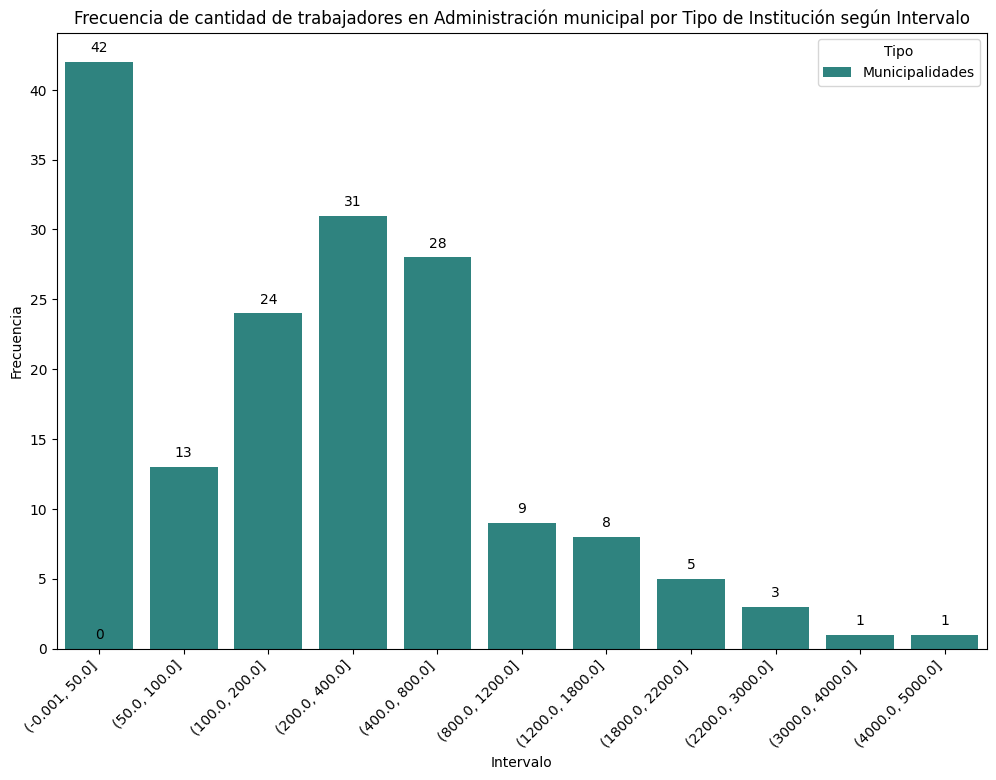

In [20]:
CantPersonasAdm['intervalos'] = pd.Categorical(CantPersonasAdm['intervalos'], ordered=True, categories=CantPersonasAdm['intervalos'].unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CantPersonasAdm, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cantidad de trabajadores en Administración municipal por Tipo de Institución según Intervalo')

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

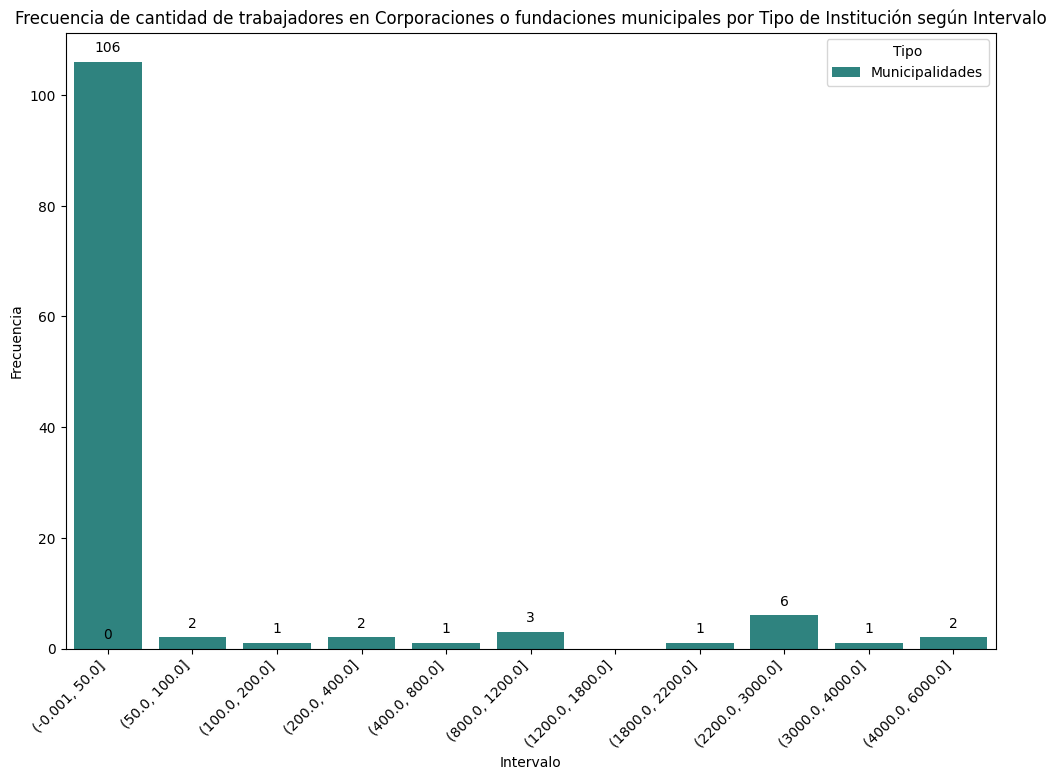

In [21]:
CantPersonasCorp['intervalos'] = pd.Categorical(CantPersonasCorp['intervalos'], ordered=True, categories=CantPersonasCorp['intervalos'].unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CantPersonasCorp, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cantidad de trabajadores en Corporaciones o fundaciones municipales por Tipo de Institución según Intervalo')

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

## Pregunta P2.5

In [22]:
funciones = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.5.1","P2.5.2","P2.5.3","P2.5.4","P2.5.5","P2.5.6","P2.5.7","P2.5.8"]]

In [23]:
funciones = funciones.replace("#s.i.",0)
funciones = funciones.replace("#n.s.",0)
funciones = funciones.replace("#n.a.",0)

In [24]:
def convertir_a_1(valor):
    return 1 if valor != 0 else 0

In [25]:
columnas_p2_5 = funciones.columns[funciones.columns.str.startswith("P2.5")]
funciones[columnas_p2_5] = funciones[columnas_p2_5].applymap(convertir_a_1)

C:\Users\alejo\AppData\Local\Temp\ipykernel_4592\3883449651.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  funciones[columnas_p2_5] = funciones[columnas_p2_5].applymap(convertir_a_1)


In [26]:
columnas_frecuencia = ['Tipo','P2.5.1', 'P2.5.2', 'P2.5.3', 'P2.5.4', 'P2.5.5', 'P2.5.6', 'P2.5.7', 'P2.5.8']
df_frecuencia = funciones[columnas_frecuencia]
columnas_frecuencia = ['Tipo','P2.5.1', 'P2.5.2', 'P2.5.3', 'P2.5.4', 'P2.5.5', 'P2.5.6', 'P2.5.7', 'P2.5.8']
df_frecuencia = funciones[columnas_frecuencia]

df_melted = pd.melt(df_frecuencia, id_vars=['Tipo'], var_name='Columna', value_name='Frecuencia')

df_melted = df_melted[df_melted['Frecuencia'] == 1]

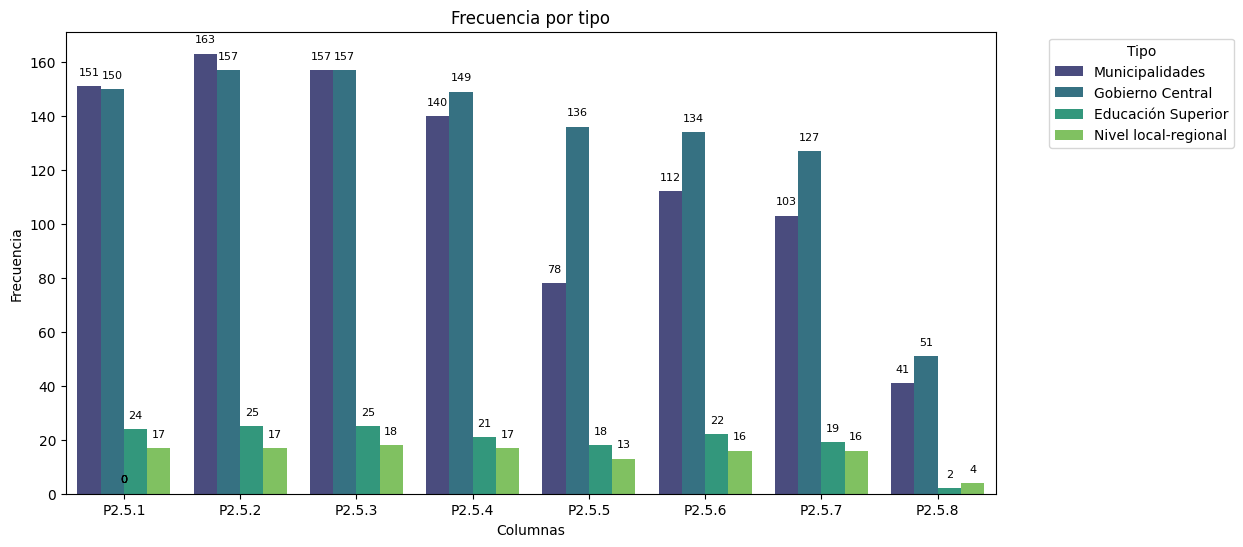

In [27]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='Columna', hue='Tipo', data=df_melted, palette='viridis')

plt.xlabel('Columnas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia por tipo')

for p in ax.patches:
    ax.annotate((f'{round(p.get_height())}'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)


plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Pregunta P2.6b

In [28]:
PersInfor = cuestionario[["Tipo","P1.1.1","P2.6b.1","P2.6b.2"]]
PersInfor = PersInfor.replace({'#s.i.': 0, '#n.a.': 0})

PersInfor['P2.6b.1'] = pd.to_numeric(PersInfor['P2.6b.1'], errors="coerce")
PersInfor['P2.6b.2'] = pd.to_numeric(PersInfor['P2.6b.2'], errors="coerce")
PersInfor['P2.6b.1'] = PersInfor['P2.6b.1'].astype(float)
PersInfor['P2.6b.2'] = PersInfor['P2.6b.2'].astype(float)
pivot_table = PersInfor.pivot_table(index='Tipo', values=['P2.6b.1', 'P2.6b.2'], aggfunc='sum')

df_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
df_percentage = df_percentage.dropna()

df_percentage['P2.6b.1'] = pd.to_numeric(df_percentage['P2.6b.1'])
df_percentage['P2.6b.2'] = pd.to_numeric(df_percentage['P2.6b.2'])

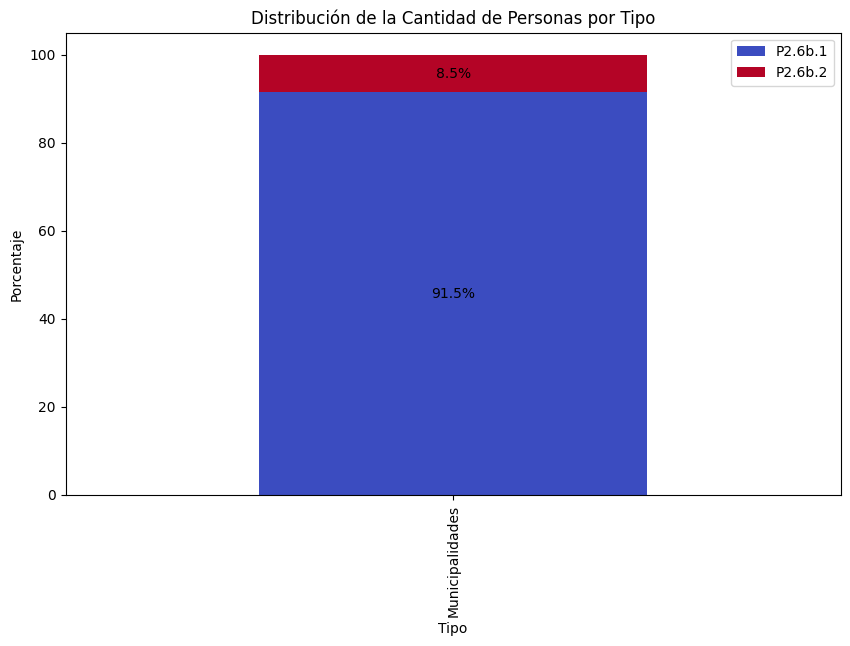

In [29]:
ax = df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Distribución de la Cantidad de Personas por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Porcentaje')
plt.legend(['P2.6b.1', 'P2.6b.2'], loc='upper right')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

## Pregunta P2.7

In [30]:
PropEquipos = cuestionario[["Tipo","P2.GC.1","P2.M.1.1","P2.M.1.2","P2.7.1","P2.7.2","P2.7.3","P2.7.4","P2.7.5","P2.7.6"]]
PropEquipos = PropEquipos.replace({'#s.i.': 0, '#n.a.': 0})

In [31]:
PropEquipos["PersonalInstitución"] = PropEquipos["P2.GC.1"] + PropEquipos["P2.M.1.1"] + PropEquipos["P2.M.1.2"]
PropEquipos["PersonalTIC"] = PropEquipos["P2.7.1"] + PropEquipos["P2.7.2"] + PropEquipos["P2.7.3"] + PropEquipos["P2.7.4"] + PropEquipos["P2.7.5"] + PropEquipos["P2.7.6"]
PropEquipos["ProporcionTIC"] = PropEquipos["PersonalTIC"] * 100 / PropEquipos["PersonalInstitución"]

In [32]:
PropTIC = PropEquipos[["Tipo","ProporcionTIC"]]
PropTIC = PropTIC.replace({np.inf: np.nan})
PropTIC = PropTIC.dropna()
bin = [0,10,20,30,40,50,60,70,80,90,100]
bins = pd.cut(PropTIC['ProporcionTIC'], bins=bin, include_lowest=True)
PropTIC['intervalos'] = bins

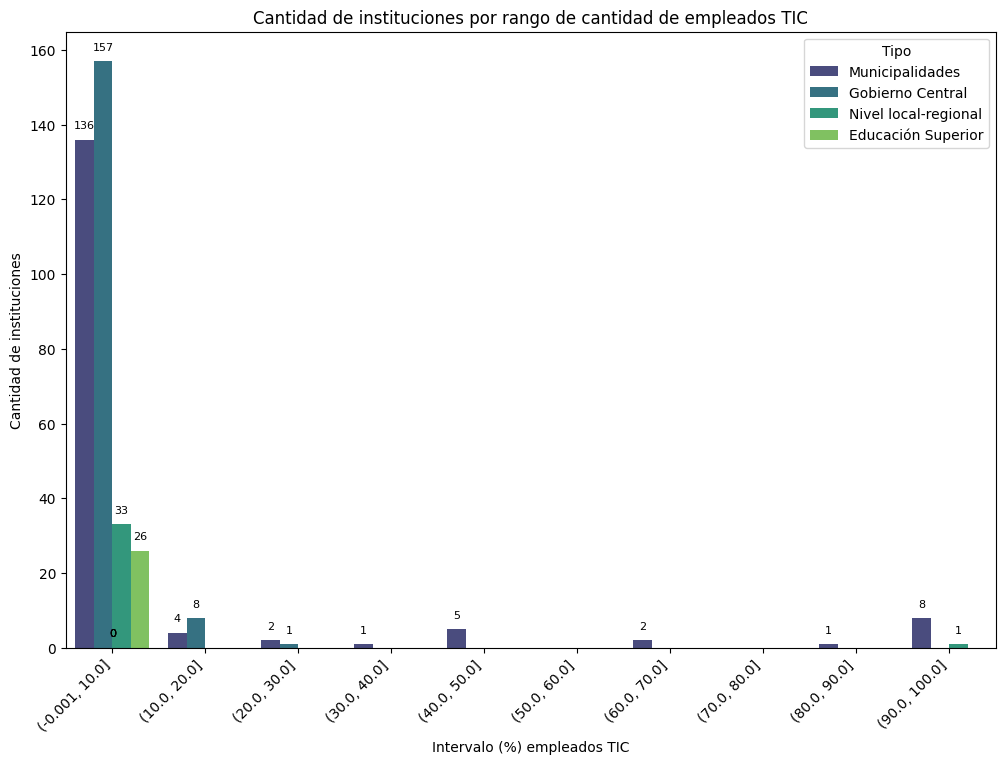

In [33]:

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=PropTIC, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo (%) empleados TIC')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de cantidad de empleados TIC')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [34]:
pivot_table = PropEquipos.pivot_table(index='Tipo', values=["P2.7.1","P2.7.2","P2.7.3","P2.7.4","P2.7.5","P2.7.6"], aggfunc='sum')

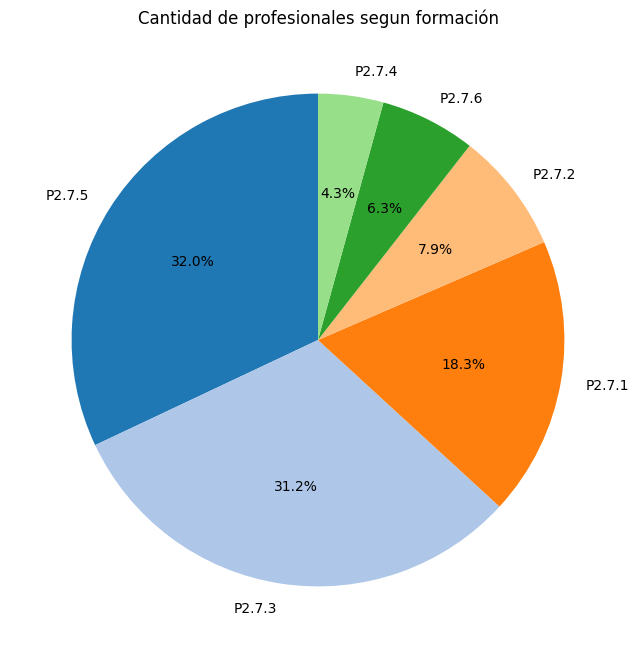

In [35]:
df_sum = pivot_table.sum()
df_sum = df_sum.sort_values(ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(df_sum, labels=df_sum.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Cantidad de profesionales segun formación')
plt.show()

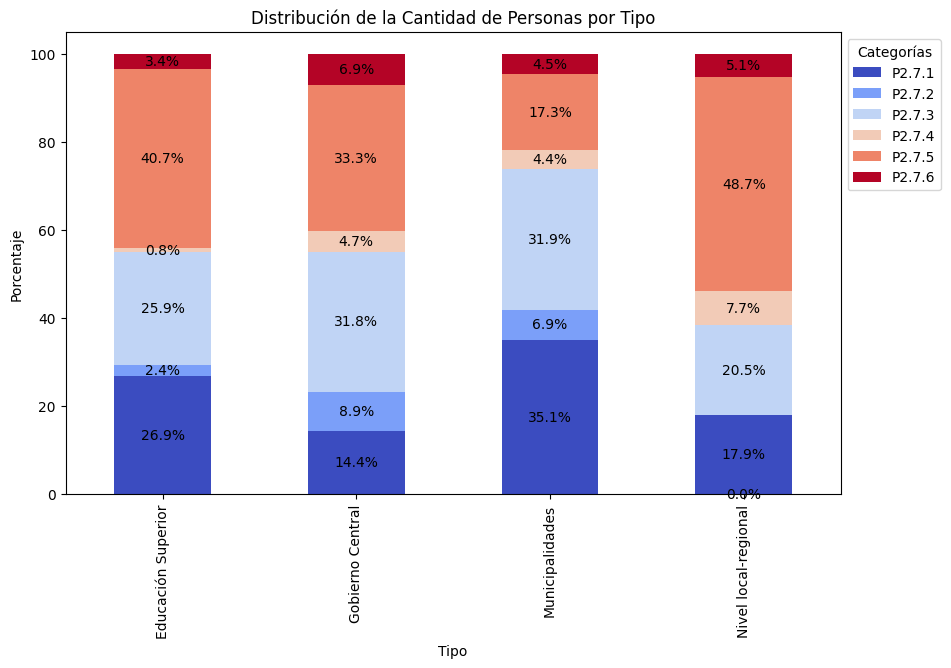

In [36]:
df_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

ax = df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Distribución de la Cantidad de Personas por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Porcentaje')
plt.legend(title='Categorías', bbox_to_anchor=(1, 1), loc='upper left')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

## Pregunta 2.8

In [37]:
ProfPorPerfil = cuestionario[["Tipo","P2.8.1.3","P2.8.2.3","P2.8.3.3","P2.8.4.3","P2.8.5.3","P2.8.6.3","P2.8.7.3","P2.8.8.3","P2.8.9.3","P2.8.10.3","P2.8.11.3","P2.8.12.3","P2.8.13.3","P2.8.14.3","P2.8.15.3","P2.8.16.3","P2.8.17.3"]]
ProfPorPerfil = ProfPorPerfil.replace({'#s.i.': 0, '#n.a.': 0})
ProfPorPerfil[["P2.8.1.3","P2.8.2.3","P2.8.3.3","P2.8.4.3","P2.8.5.3","P2.8.6.3","P2.8.7.3","P2.8.8.3","P2.8.9.3","P2.8.10.3","P2.8.11.3","P2.8.12.3","P2.8.13.3","P2.8.14.3","P2.8.15.3","P2.8.16.3","P2.8.17.3"]] = ProfPorPerfil[["P2.8.1.3","P2.8.2.3","P2.8.3.3","P2.8.4.3","P2.8.5.3","P2.8.6.3","P2.8.7.3","P2.8.8.3","P2.8.9.3","P2.8.10.3","P2.8.11.3","P2.8.12.3","P2.8.13.3","P2.8.14.3","P2.8.15.3","P2.8.16.3","P2.8.17.3"]].astype(int)

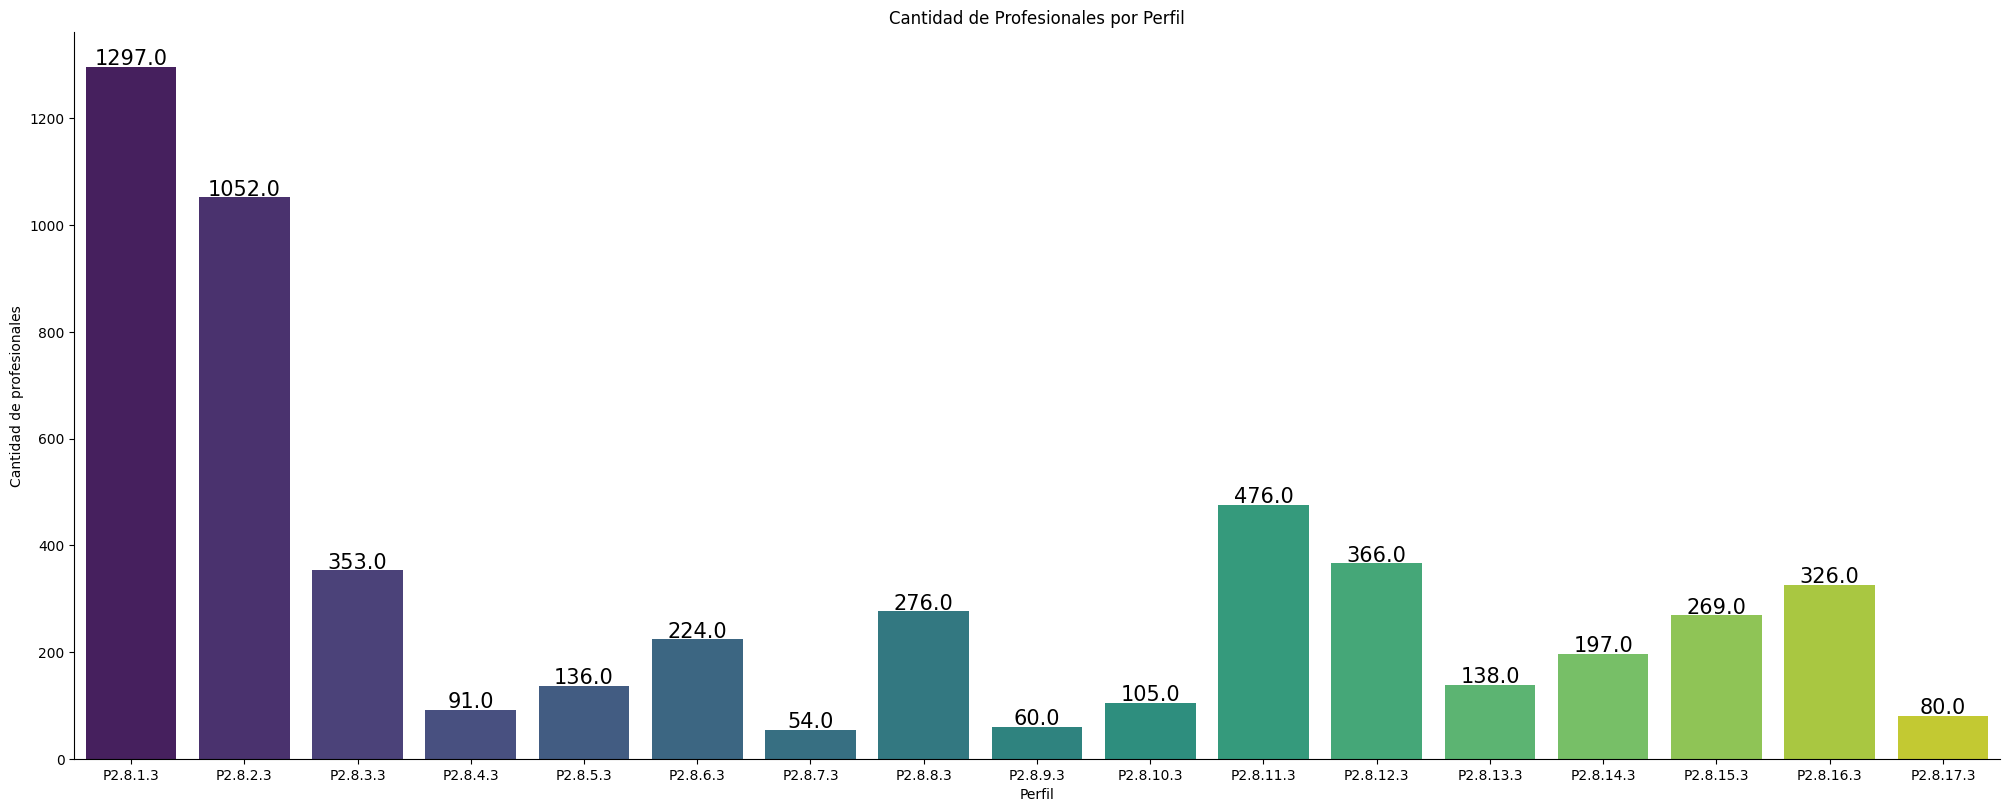

In [38]:
g = sns.catplot(data=ProfPorPerfil, kind="bar", height=8, aspect=2.5, palette='viridis',estimator="sum",errorbar=None)

plt.title('Cantidad de Profesionales por Perfil')
plt.xlabel('Perfil')
plt.ylabel('Cantidad de profesionales')

for ax in g.axes.flat:
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width / 2, y + height + 15), ha='center', va='center',fontsize=15)

plt.show()

In [39]:
df_melted = pd.melt(ProfPorPerfil, id_vars=['Tipo'], var_name='Columna', value_name='Cantidad')

df_sum = df_melted.groupby(['Tipo', 'Columna'])['Cantidad'].sum().reset_index()

df_sum['Porcentaje'] = df_sum.groupby('Columna')['Cantidad'].transform(lambda x: x / x.sum() * 100)

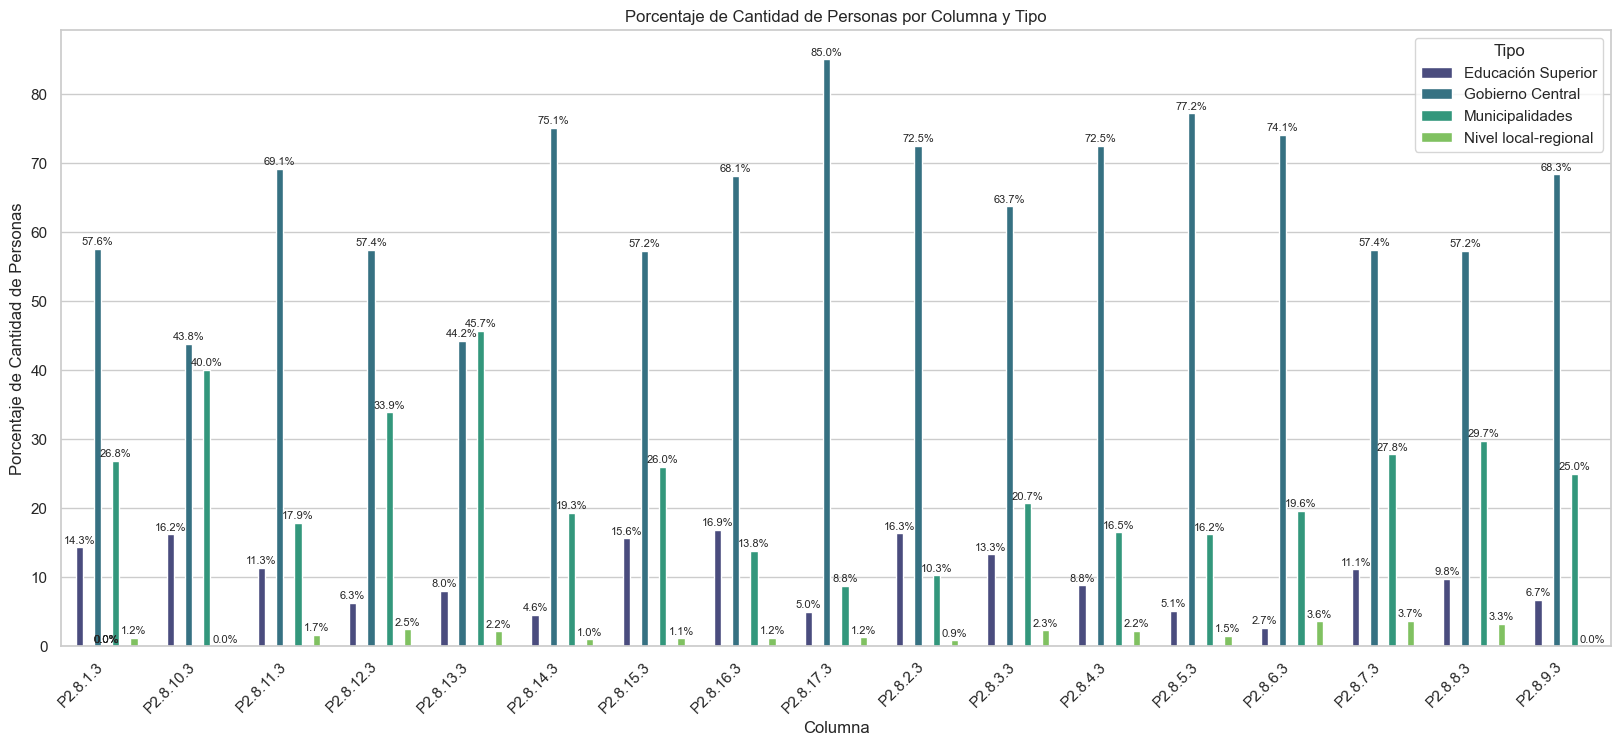

In [51]:

plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x='Columna', y='Porcentaje', hue='Tipo', data=df_sum, palette='viridis', dodge=True, gap=0.6,width=0.8)

plt.subplots_adjust(hspace=0.125, wspace=0.125)
plt.title('Porcentaje de Cantidad de Personas por Columna y Tipo')
plt.xlabel('Columna')
plt.ylabel('Porcentaje de Cantidad de Personas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo', loc='upper right')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height + 1), ha='center', va='center', fontsize=8)

plt.show()


## P4.3 (en realiadad P4.4)

In [176]:
FirmAutorizados = cuestionario[["Tipo","P4.4"]]
FirmAutorizados = FirmAutorizados.replace({'#s.i.': 0, '#n.a.': 0})

In [178]:
bin = [0, 50, 200, 400, 700, 1200, 3000, 5000, 10000, 30000]
bins = pd.cut(FirmAutorizados['P4.4'], bins=bin, include_lowest=True)
FirmAutorizados['intervalos'] = bins

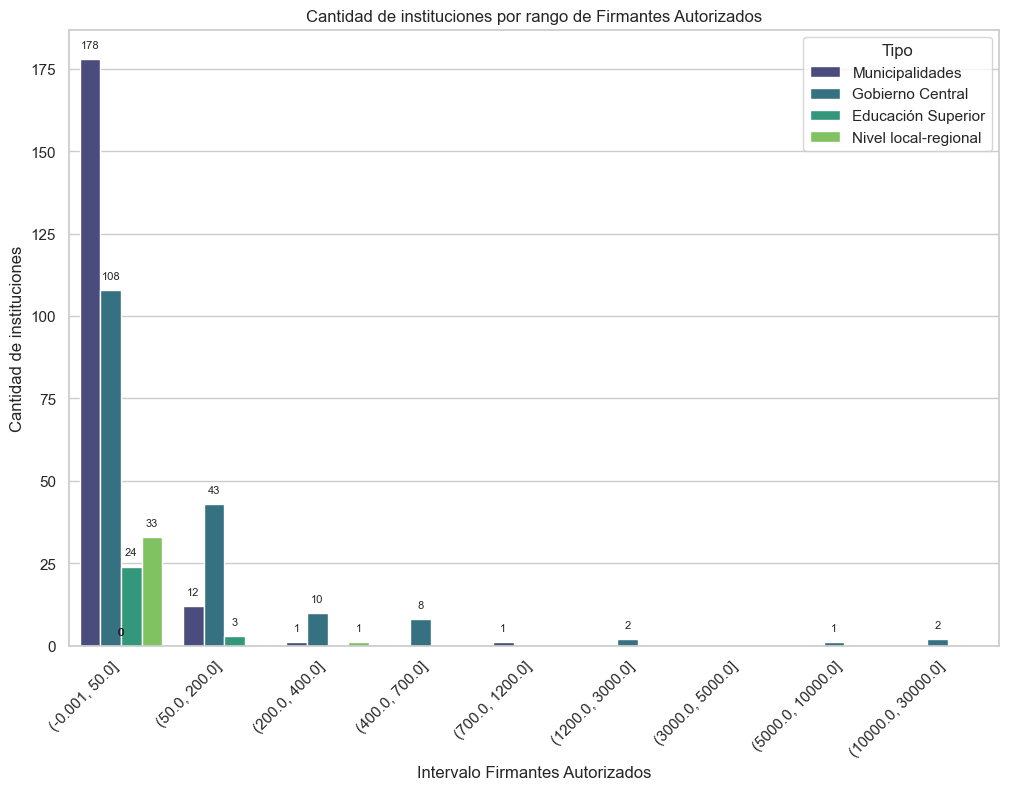

In [179]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=FirmAutorizados, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Firmantes Autorizados')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Firmantes Autorizados')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

## P5.1 (en realidad P4.4)

In [180]:
DocsFirmados = cuestionario[["Tipo","P5.1"]]
DocsFirmados = DocsFirmados.replace({'#s.i.': 0, '#n.a.': 0})

In [181]:
bin = [0, 500, 2000, 5000, 8000, 12000, 20000, 50000, 100000, 150000,300000,700000,1200000,2000000]
bins = pd.cut(DocsFirmados['P5.1'], bins=bin, include_lowest=True)
DocsFirmados['intervalos'] = bins

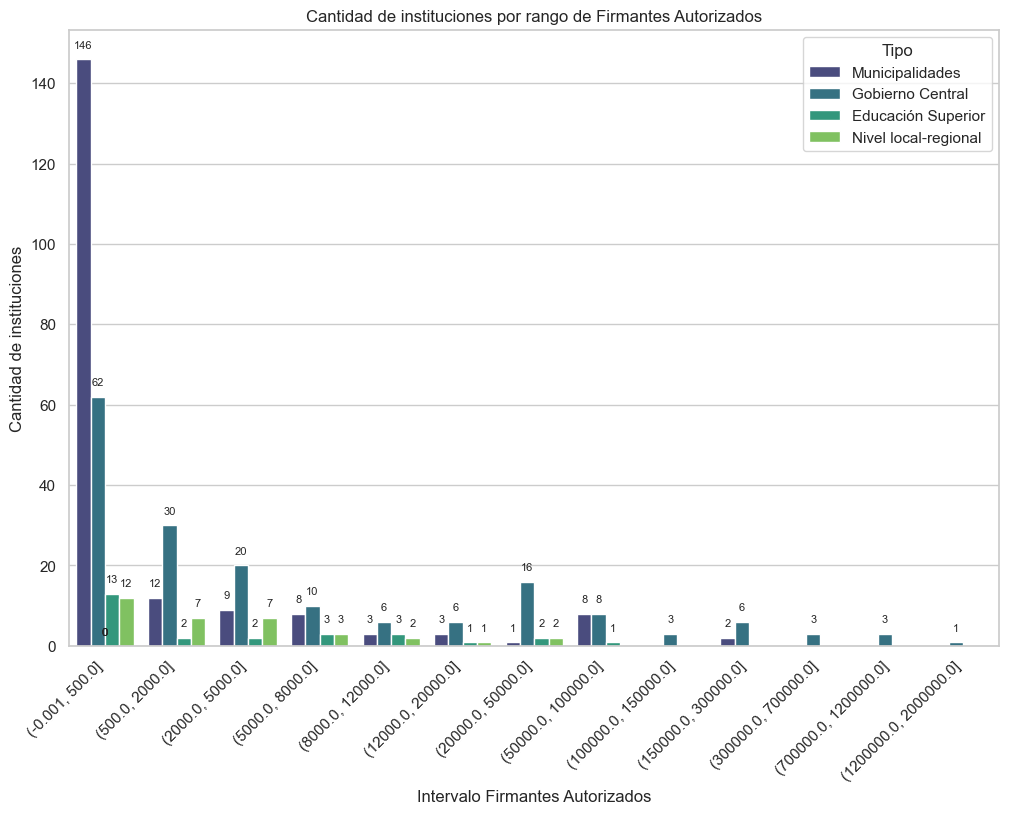

In [183]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=DocsFirmados, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Firmantes Autorizados')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Firmantes Autorizados')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

## P5.2

In [184]:
OficPartes = cuestionario[["Tipo","P5.2"]]
OficPartes = OficPartes.replace({'#s.i.': 0, '#n.a.': 0})

In [185]:
OficPartes = OficPartes.loc[OficPartes['P5.2'] <= 1000]

In [186]:
bin = [-0.1,0,3, 5, 10, 25, 50, 100, 200, 300, 400, 500, 1000]
bins = pd.cut(OficPartes['P5.2'], bins=bin)
OficPartes['intervalos'] = bins

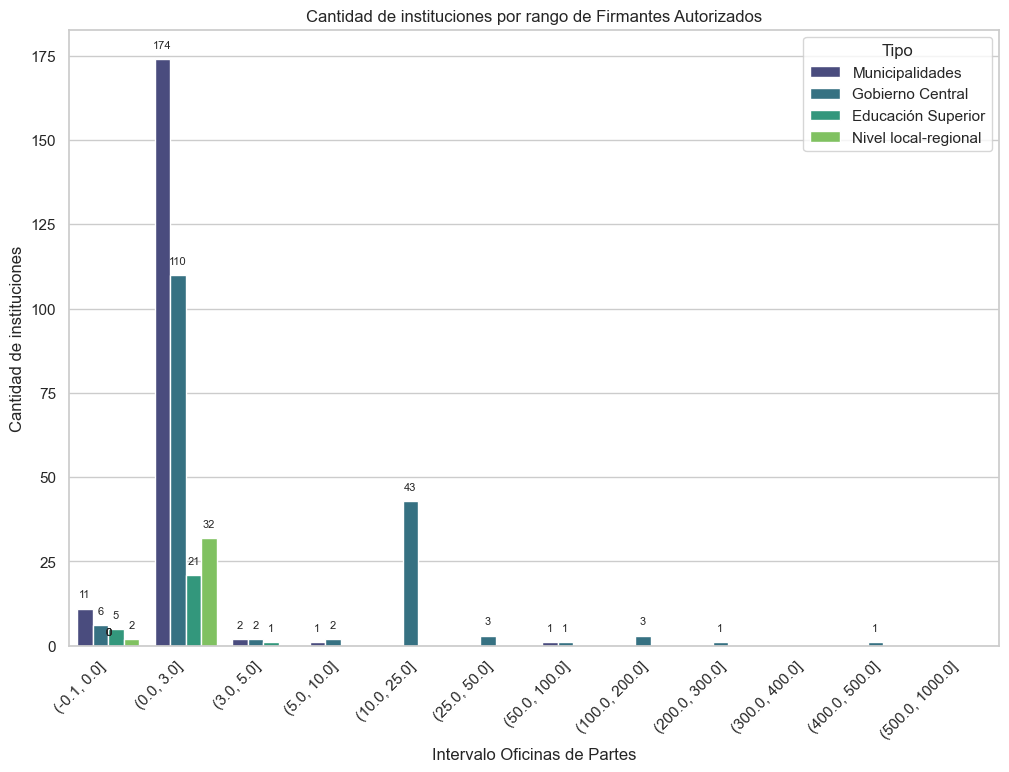

In [187]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=OficPartes, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Oficinas de Partes')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Firmantes Autorizados')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

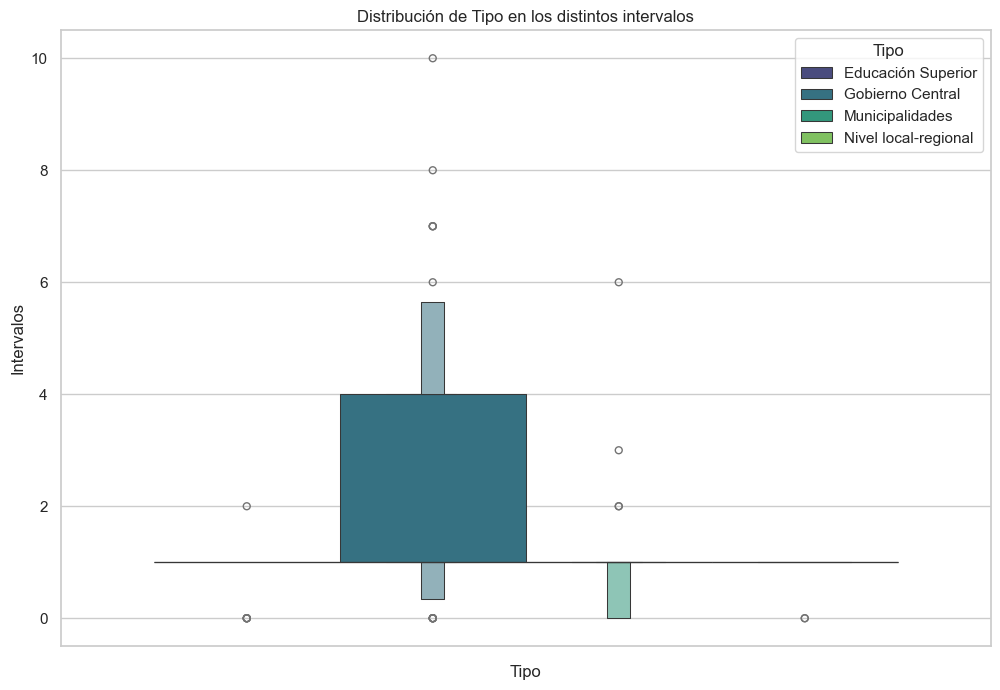

In [188]:
OficPartes['intervalos'] = OficPartes['intervalos'].cat.codes
OficPartes['Tipo'] = OficPartes['Tipo'].astype('category')

plt.figure(figsize=(12, 8))
sns.boxenplot(hue='Tipo', y='intervalos', data=OficPartes,palette='viridis')

plt.xlabel('Tipo')
plt.ylabel('Intervalos')
plt.title('Distribución de Tipo en los distintos intervalos')

plt.xticks(rotation=45, ha='right')

plt.show()


## P5.3

In [194]:
PersOfiPartes = cuestionario[["Tipo","P5.3"]]
PersOfiPartes = PersOfiPartes.replace({'#s.i.': 0, '#n.a.': 0})

In [195]:
pivot_table = PersOfiPartes.pivot_table(index='Tipo', values=["P5.3"], aggfunc='sum')

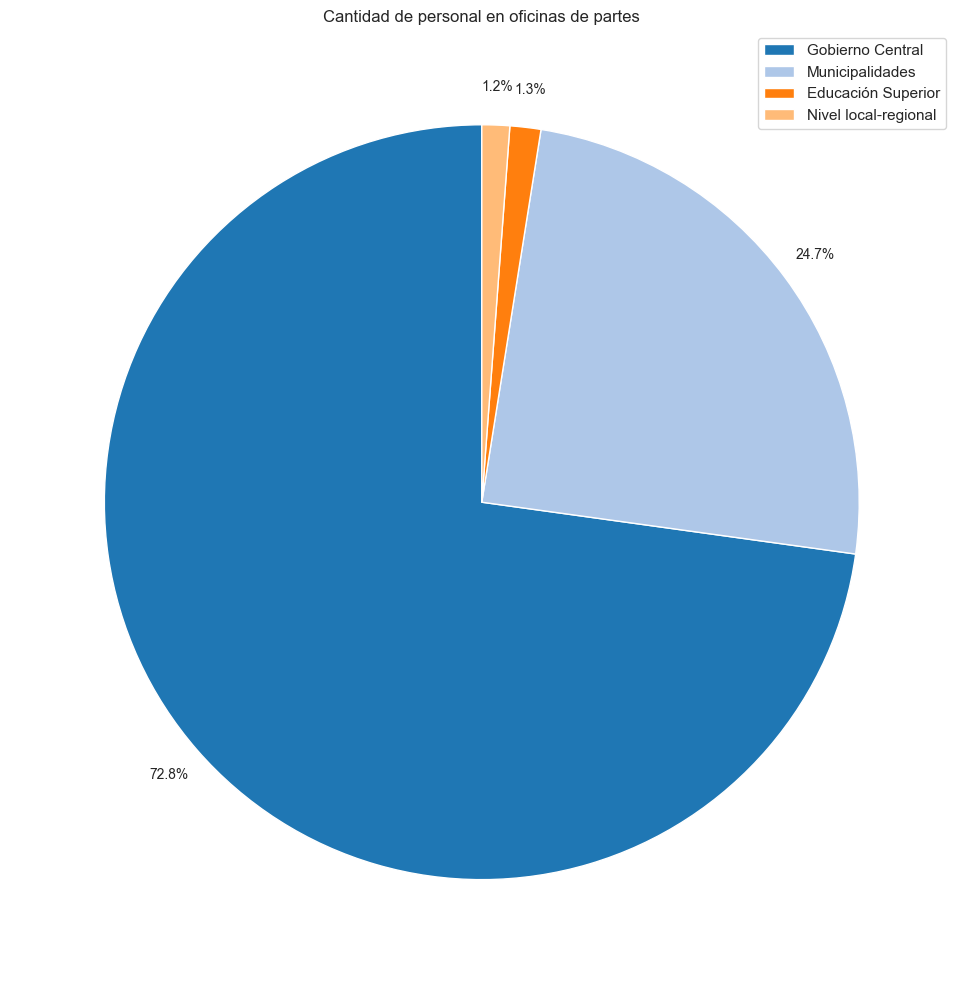

In [196]:
df = pivot_table.sort_values(by='P5.3', ascending=False)['P5.3']

plt.figure(figsize=(10, 10))
plt.pie(df, labels=None, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors,pctdistance=1.1,textprops={'fontsize': 10})
plt.legend(df.index, loc='upper right') 
plt.title('Cantidad de personal en oficinas de partes')
plt.tight_layout()
plt.show()

In [53]:
cuestionario.head(2)

,ID,Fecha de respuesta,Tipo,P1.1.1,P1.1.2,P1.1.3,P1.1.4,P2.GC.1,P2.M.1.1,P2.M.1.2,...,P13.M.2.16,P13.M.2.17,P13.M.2.18,P13.M.2.19,P13.M.3.1,P13.M.3.2,P13.M.3.3,P13.M.3.4,P13.M.3.5,P14.1
1,1,2023-10-25 10:53:00,Municipalidades,Municipalidad de Pinto,Patricio Alejandro Garrido Torres,informatica@munipinto.cl,'+56 9 8332 7173,#n.a.,120,0,...,6570499,22970062,0,0,100,0,0,0,100,#n.a.
2,2,2023-10-25 13:18:00,Municipalidades,Municipalidad de Ránquil,Francisco Javier Rondanelli Morales,informatica@mranquil.cl,'+56 9 5407 3649,#n.a.,1,0,...,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#n.a.
